<a href="https://colab.research.google.com/github/tacclab/NCBIXML_parser/blob/main/Tirocinio_Ispezione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Scaricamento del Dataset Rd
Prima di tutto, possiamo scaricare un dataset che simuli la distribuzione di vari casi di malattie trasmesse da alimenti come salmonella, listeria, e altre. Questo dataset potrebbe includere colonne per:

Data del campione
Tipo_di_Malattia (e.g., Salmonella, Listeria, etc.)
Origine_Alimento (e.g., carne, uova, verdure)
Numero_Casi registrati
Regione di segnalazione
Potremmo usare Python per generare dati fittizi che rispecchino una distribuzione realistica di queste malattie.



In [6]:
import pandas as pd
import numpy as np

# Scaricamento dati
date_rng = pd.date_range(start='1/1/2022', end='31/12/2022', freq='D')
date_random = np.random.choice(date_rng, size=1000)

# Scaricamento di altri dati, come le regioni d'Italia
regioni_italiane = ['Piemonte', 'Lombardia', 'Veneto', 'Liguria', 'Emilia-Romagna', 'Toscana', 'Umbria',
                    'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
                    'Calabria', 'Sicilia', 'Sardegna']

data = {
  'Data': date_random,
  'Tipo_di_Malattia': np.random.choice(['Salmonella', 'Listeria', 'E.Coli', 'Botulismo'], size=1000),
  'Origine_Alimento': np.random.choice(['Carne', 'Uova', 'Verdure', 'Frutta', 'Pesce'], size=1000),
  'Numero_Casi': np.random.randint(1, 100, size=1000),
  'Regione': np.random.choice(regioni_italiane, size=1000)
}

df = pd.DataFrame(data)
df

<ipython-input-6-d0205fdcb6fc>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_rng = pd.date_range(start='1/1/2022', end='31/12/2022', freq='D')


,Data,Tipo_di_Malattia,Origine_Alimento,Numero_Casi,Regione
0,2022-04-27,Salmonella,Carne,29,Basilicata
1,2022-09-16,Salmonella,Uova,30,Toscana
2,2022-08-26,Salmonella,Frutta,60,Basilicata
3,2022-01-31,Salmonella,Verdure,51,Puglia
4,2022-07-22,Botulismo,Verdure,33,Emilia-Romagna
...,...,...,...,...,...
995,2022-07-20,Salmonella,Verdure,18,Umbria
996,2022-03-30,Listeria,Frutta,76,Puglia
997,2022-08-26,Salmonella,Frutta,84,Calabria
998,2022-05-14,E.Coli,Uova,99,Sicilia


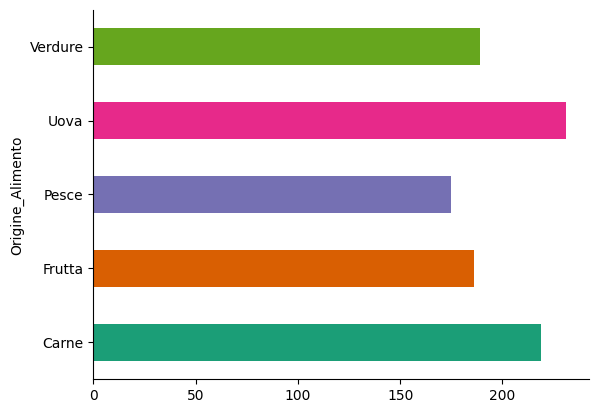

In [8]:
# @title Origine_Alimento

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Origine_Alimento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

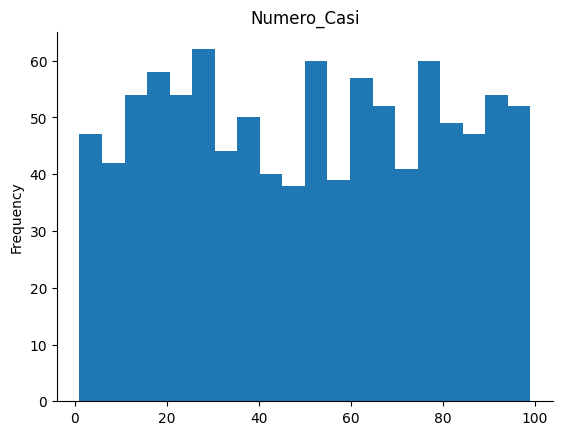

In [7]:
# @title Numero_Casi

from matplotlib import pyplot as plt
df['Numero_Casi'].plot(kind='hist', bins=20, title='Numero_Casi')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 2. Analisi Statistica Descrittiva
Una volta creato il dataset, gli studenti possono eseguire un'analisi statistica descrittiva per comprendere meglio i dati. Questo potrebbe includere:

Calcolo della media, mediana, e modalità
Distribuzione dei casi per tipo di malattia e origine dell'alimento
Analisi temporale per vedere come i casi si distribuiscono nel tempo



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Settaggio dello stile del grafico
sns.set(style="whitegrid")

<ipython-input-11-ea2563001697>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tipo_di_Malattia', data=df, palette='viridis')


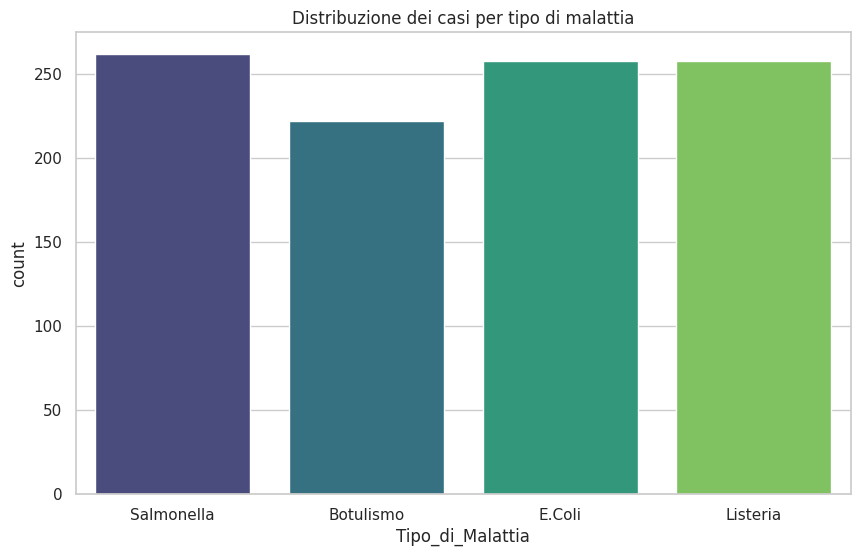

In [11]:
# Distribuzione dei casi per tipo di malattia
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_di_Malattia', data=df, palette='viridis')
plt.title('Distribuzione dei casi per tipo di malattia')
plt.show()




<ipython-input-12-55554819bb44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Origine_Alimento', data=df, palette='cividis')


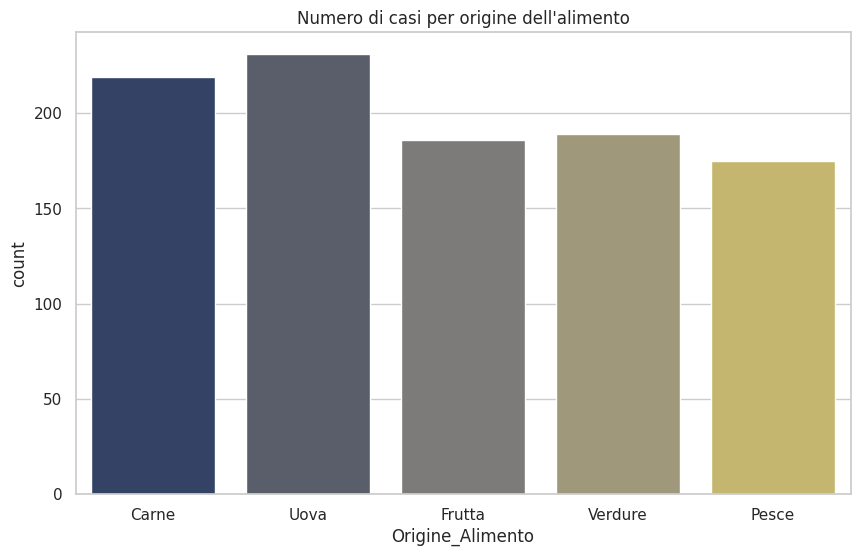

In [12]:
# Numero di casi per origine dell'alimento
plt.figure(figsize=(10, 6))
sns.countplot(x='Origine_Alimento', data=df, palette='cividis')
plt.title('Numero di casi per origine dell\'alimento')
plt.show()

<ipython-input-13-bed829607118>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Regione', data=df, palette='mako', order = df['Regione'].value_counts().index)


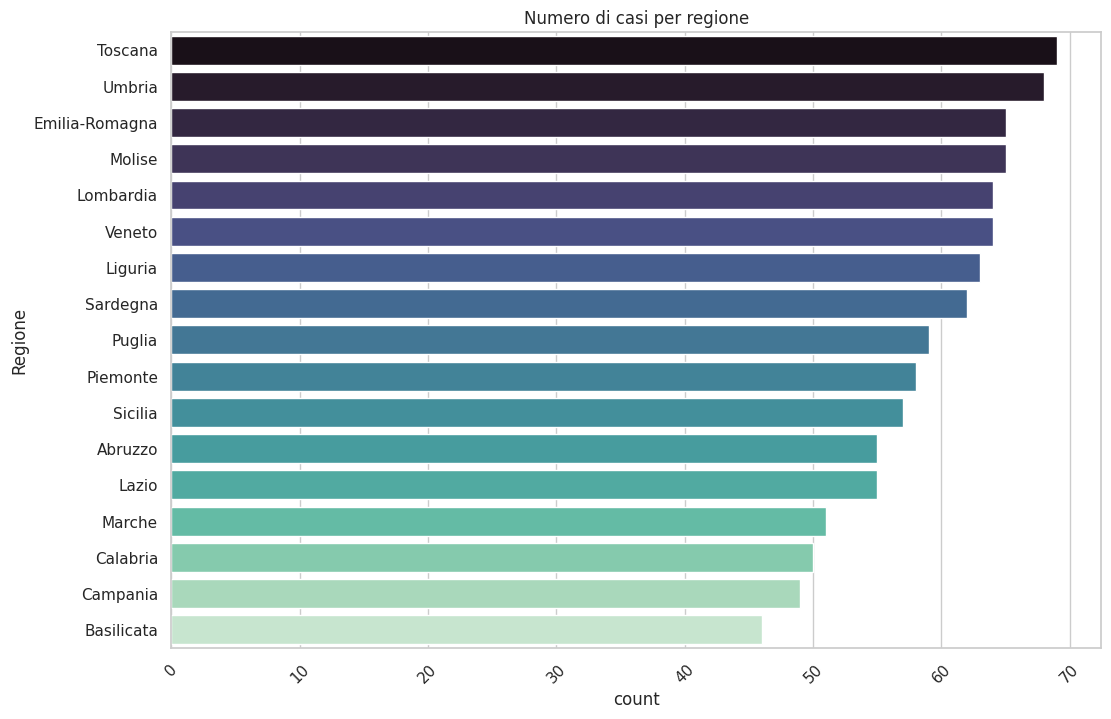

In [13]:
# Numero di casi per regione
plt.figure(figsize=(12, 8))
sns.countplot(y='Regione', data=df, palette='mako', order = df['Regione'].value_counts().index)
plt.title('Numero di casi per regione')
plt.xticks(rotation=45)
plt.show()

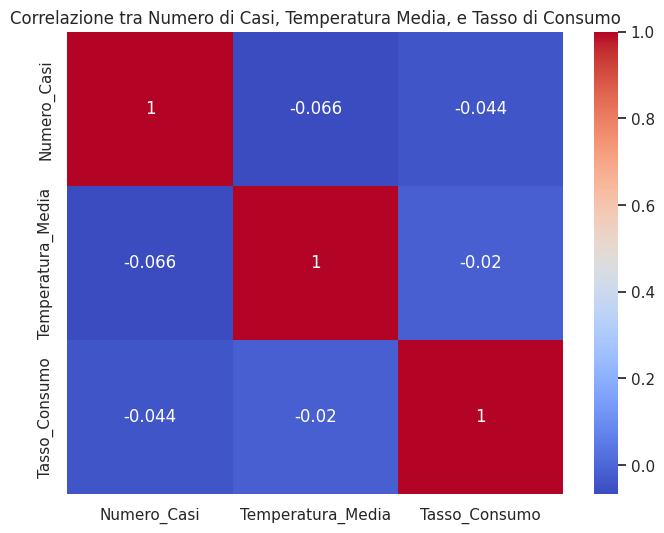

In [14]:
# Per esempio, aggiungiamo colonne fittizie per dimostrazione
df['Temperatura_Media'] = np.random.uniform(10, 30, size=1000)
df['Tasso_Consumo'] = np.random.uniform(0, 1, size=1000)

corr = df[['Numero_Casi', 'Temperatura_Media', 'Tasso_Consumo']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlazione tra Numero di Casi, Temperatura Media, e Tasso di Consumo')
plt.show()


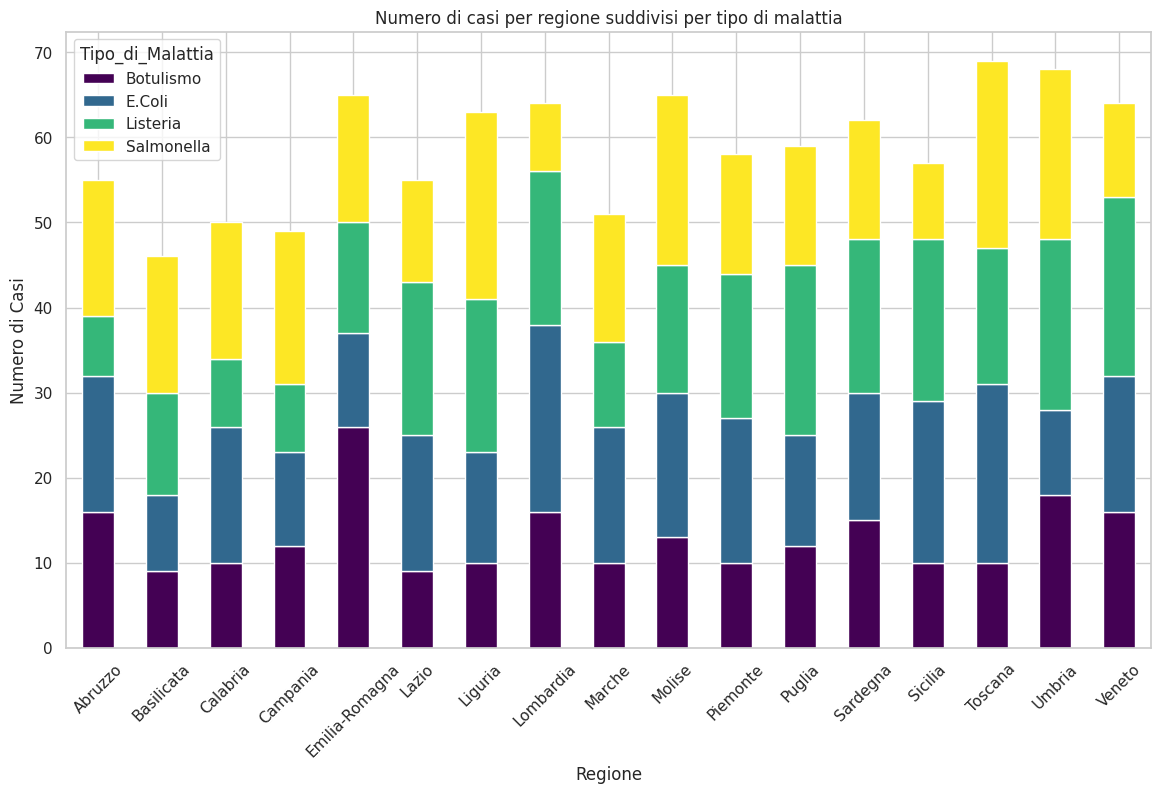

In [15]:
# Generazione di un esempio di dati impilati
data_impilati = df.groupby(['Regione', 'Tipo_di_Malattia']).size().unstack()

data_impilati.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Numero di casi per regione suddivisi per tipo di malattia')
plt.ylabel('Numero di Casi')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Mappatura delle regioni italiane in Nord, Centro, Sud e Isole
regioni_a_macroarea = {
    'Piemonte': 'Nord', 'Lombardia': 'Nord', 'Veneto': 'Nord', 'Liguria': 'Nord', 'Emilia-Romagna': 'Nord',
    'Toscana': 'Centro', 'Umbria': 'Centro', 'Marche': 'Centro', 'Lazio': 'Centro',
    'Abruzzo': 'Sud', 'Molise': 'Sud', 'Campania': 'Sud', 'Puglia': 'Sud', 'Basilicata': 'Sud', 'Calabria': 'Sud',
    'Sicilia': 'Isole', 'Sardegna': 'Isole'
}

# Applichiamo la mappatura al dataset per creare una nuova colonna "Macro_Area"
df['Macro_Area'] = df['Regione'].map(regioni_a_macroarea)



<ipython-input-19-f48bc15ee7b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Macro_Area', data=df, palette='Set2', order=['Nord', 'Centro', 'Sud', 'Isole'])


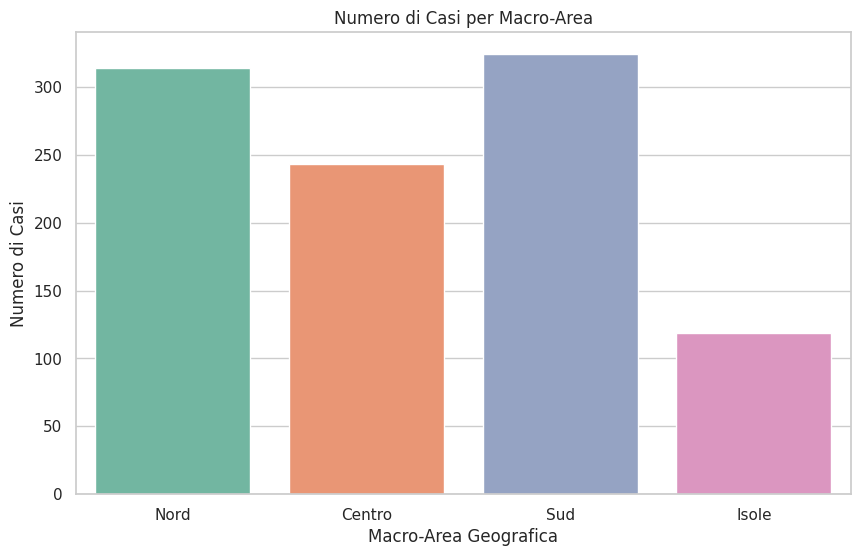

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Macro_Area', data=df, palette='Set2', order=['Nord', 'Centro', 'Sud', 'Isole'])
plt.title('Numero di Casi per Macro-Area')
plt.xlabel('Macro-Area Geografica')
plt.ylabel('Numero di Casi')
plt.show()


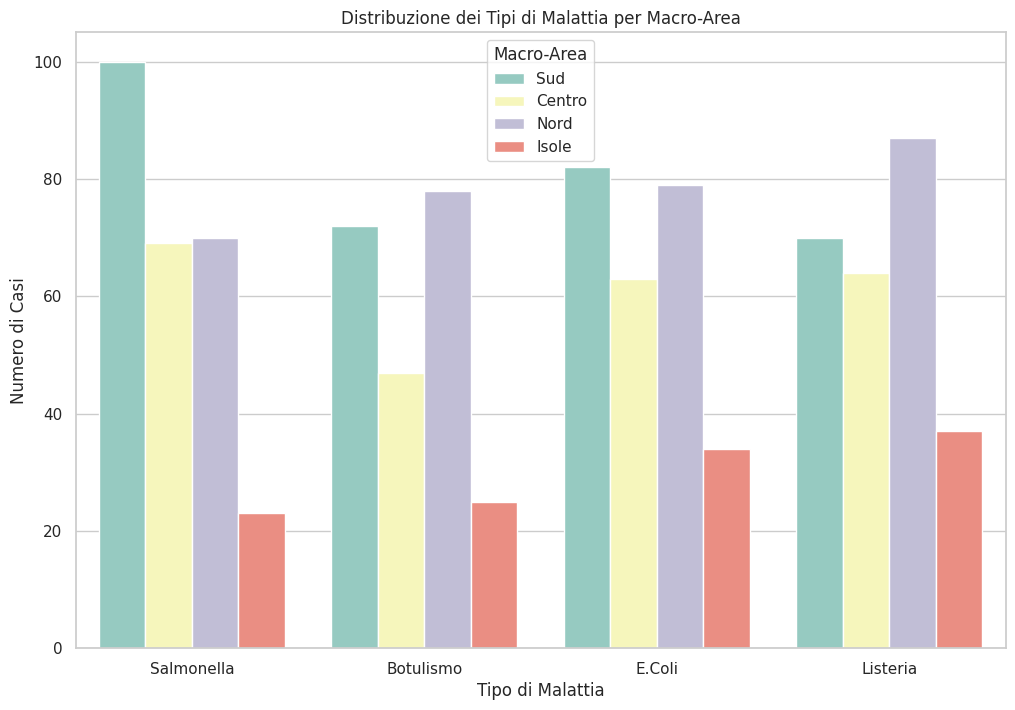

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Tipo_di_Malattia', hue='Macro_Area', data=df, palette='Set3')
plt.title('Distribuzione dei Tipi di Malattia per Macro-Area')
plt.xlabel('Tipo di Malattia')
plt.ylabel('Numero di Casi')
plt.legend(title='Macro-Area')
plt.show()


# 3. Introduzione al Machine Learning
Potresti introdurre concetti base di machine learning, utilizzando il dataset per:

Prevedere il numero di casi di malattia basandosi su variabili come l'origine dell'alimento e la regione
Classificare gli alimenti in base al rischio di trasmissione di malattie specifiche
Un modello semplice come la regressione lineare o un albero decisionale potrebbe essere un buon punto di partenza.



              precision    recall  f1-score   support

      Centro       0.22      0.20      0.21        50
       Isole       0.23      0.25      0.24        55
        Nord       0.18      0.23      0.20        43
         Sud       0.29      0.21      0.24        52

    accuracy                           0.23       200
   macro avg       0.23      0.22      0.22       200
weighted avg       0.23      0.23      0.23       200



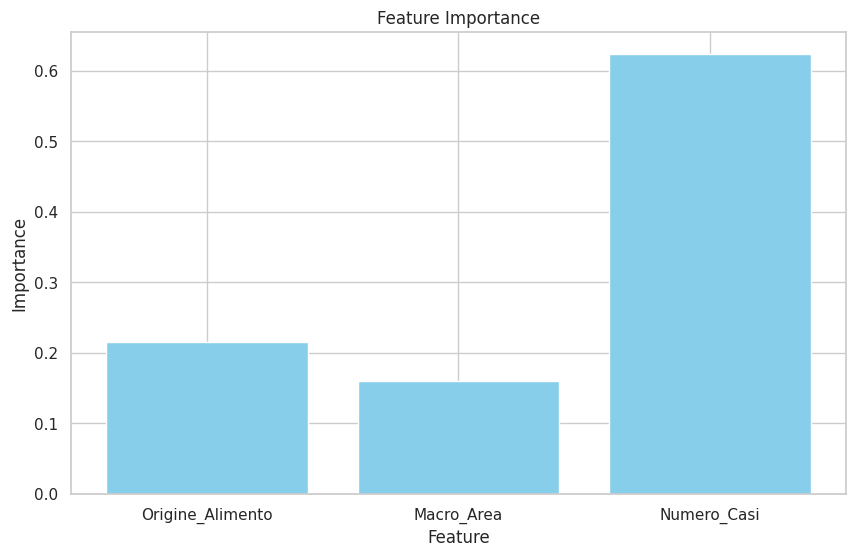

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supponendo che il DataFrame 'df' sia già stato definito come mostrato in precedenza...

# Convertiamo le variabili categoriche in numeriche
le = LabelEncoder()
df['Tipo_di_Malattia_encoded'] = le.fit_transform(df['Tipo_di_Malattia'])
df['Origine_Alimento_encoded'] = le.fit_transform(df['Origine_Alimento'])
df['Macro_Area_encoded'] = le.fit_transform(df['Macro_Area'])

# Definizione delle variabili indipendenti (X) e dipendenti (y)
X = df[['Origine_Alimento_encoded', 'Macro_Area_encoded', 'Numero_Casi']]
y = df['Tipo_di_Malattia_encoded']

# Divisione del dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione e addestramento del Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Valutazione delle prestazioni del modello sul set di test
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.inverse_transform(np.unique(y_test))))

# Analisi dell'importanza delle caratteristiche
importance = dtc.feature_importances_
features = ['Origine_Alimento', 'Macro_Area', 'Numero_Casi']

plt.figure(figsize=(10, 6))
plt.bar(features, importance, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


# Predizioni con il ML

Per effettuare predizioni specifiche per l'anno 2023 usando il modello di Decision Tree Classifier addestrato, possiamo seguire questi passaggi:

Un approccio potrebbe essere analizzare le tendenze nel dataset del 2022 per identificare modelli o cambiamenti significativi che potrebbero influenzare i risultati nel 2023.


Per fare previsioni per il 2023 basandoci sulle tendenze osservate nel dataset del 2022, dobbiamo prima identificare queste tendenze. Dato che stiamo operando in un contesto ipotetico, procederemo con un esempio generico che assume la continuità delle tendenze del 2022 nel 2023.

Supponiamo di voler prevedere il Tipo_di_Malattia per nuovi casi nel 2023 basandoci su caratteristiche come Origine_Alimento, Macro_Area, e Numero_Casi, utilizzando le tendenze osservate nel 2022. Useremo il Decision Tree Classifier addestrato precedentemente.

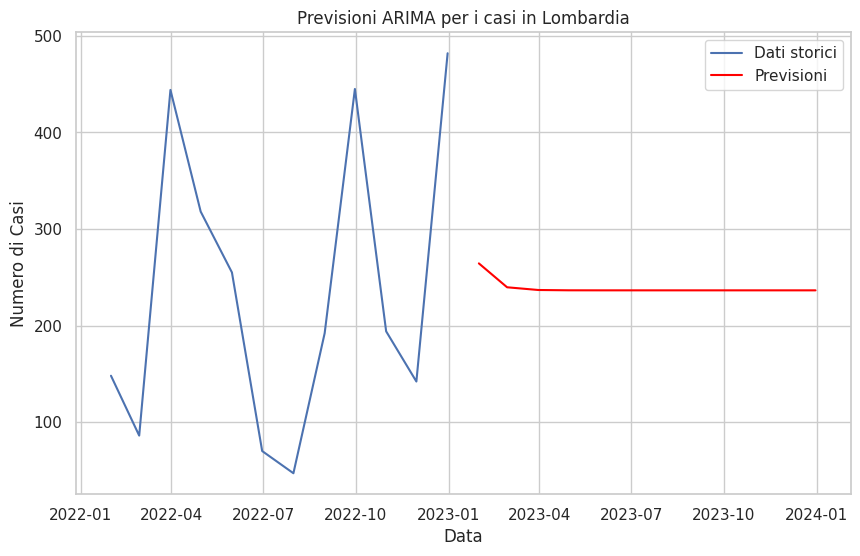

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Supponiamo che df sia il tuo DataFrame e sia già stato preparato

# Esempio: Aggregare i dati per regione e per mese per una regione specifica, diciamo "Lombardia"
df_lombardia = df[df['Regione'] == 'Lombardia'].resample('M', on='Data')['Numero_Casi'].sum()

# A questo punto, df_lombardia è una serie temporale del numero di casi mensili in Lombardia

# Applicazione del modello ARIMA
# Nota: La scelta dei parametri (p,d,q) dipende dall'analisi specifica dei dati
model = ARIMA(df_lombardia, order=(1,1,1))  # Questi parametri sono solo un esempio
model_fit = model.fit()

# Previsioni
predizioni = model_fit.forecast(steps=12)  # Previsione per i prossimi 12 mesi, ad esempio

# Visualizzazione delle previsioni
plt.figure(figsize=(10,6))
plt.plot(df_lombardia.index, df_lombardia, label='Dati storici')
plt.plot(predizioni.index, predizioni, label='Previsioni', color='red')
plt.legend()
plt.title('Previsioni ARIMA per i casi in Lombardia')
plt.xlabel('Data')
plt.ylabel('Numero di Casi')
plt.show()


# 4. Catene di Markov
Le catene di Markov sono modelli matematici che descrivono un sistema in grado di passare da uno stato all'altro, con la probabilità di passaggio da uno stato ad un altro che dipende solamente dallo stato attuale e non dalla storia precedente. Questo concetto è noto come proprietà di Markov o assenza di memoria.

Per rendere l'idea accessibile a studenti di ispezione degli alimenti, immaginiamo una situazione semplice legata alla sicurezza alimentare, come il passaggio di un alimento tra diversi stati di sicurezza: "Sicuro", "A Rischio" e "Contaminato".

Esempio: Stati di Sicurezza di un Alimento
Supponiamo che ogni giorno, un alimento possa rimanere nello stesso stato o passare a un altro stato, con certe probabilità. Ad esempio:

Da "Sicuro" ha l'80% di probabilità di rimanere "Sicuro", il 15% di diventare "A Rischio", e il 5% di diventare "Contaminato".
Da "A Rischio" ha il 50% di probabilità di rimanere "A Rischio", il 30% di tornare a "Sicuro", e il 20% di diventare "Contaminato".
Da "Contaminato" ha il 100% di probabilità di rimanere "Contaminato", dato che, per semplicità, assumiamo che una volta contaminato, l'alimento non possa tornare agli stati precedenti.
Questo sistema può essere rappresentato come una catena di Markov con la seguente matrice di transizione:

Da \ A	Sicuro	A Rischio	Contaminato

Sicuro	0.8	0.15	0.05

A Rischio	0.3	0.5	0.2

Contaminato	0	0	1


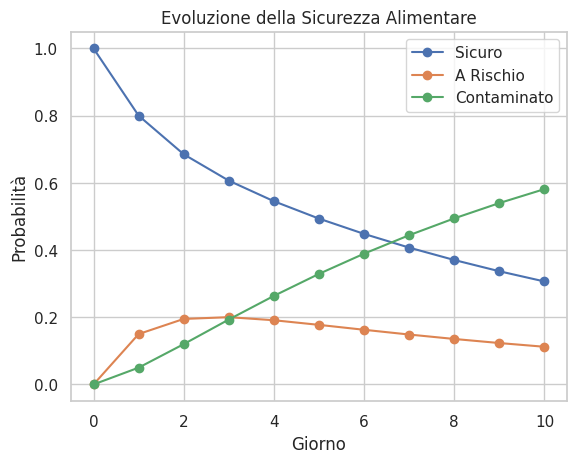

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della matrice di transizione
P = np.array([[0.8, 0.15, 0.05],
              [0.3, 0.5, 0.2],
              [0, 0, 1]])

# Stato iniziale: 100% sicuro
stato_iniziale = np.array([1, 0, 0])

# Simulazione di 10 passaggi
stati = [stato_iniziale]
for i in range(10):
    stato_successivo = stati[-1] @ P
    stati.append(stato_successivo)

stati = np.array(stati)

# Visualizzazione
plt.plot(stati[:, 0], '-o', label='Sicuro')
plt.plot(stati[:, 1], '-o', label='A Rischio')
plt.plot(stati[:, 2], '-o', label='Contaminato')
plt.xlabel('Giorno')
plt.ylabel('Probabilità')
plt.title('Evoluzione della Sicurezza Alimentare')
plt.legend()
plt.show()


Spiegazione per gli Studenti
Proprietà di Markov: Il modello si basa sull'idea che la probabilità di transizione a un nuovo stato dipende solamente dallo stato attuale, non dalla storia passata dell'alimento.

Utilizzo: Questo modello può aiutare a capire come interventi per migliorare la sicurezza alimentare (ad esempio, migliorare la conservazione o la manipolazione degli alimenti) possano influenzare la probabilità che un alimento passi da uno stato sicuro a uno a rischio o contaminato.

Visualizzazione: Il grafico mostra come, nel tempo, cambiano le probabilità che l'alimento si trovi in uno dei tre stati, fornendo una rappresentazione visiva dell'evoluzione della sicurezza alimentare.
Le catene di Markov offrono un modo potente per modellare e prevedere l'evoluzione di sistemi che passano attraverso stati diversi, basandosi su probabilità. Questo strumento può essere particolarmente utile in ambiti come la sicurezza alimentare, dove è importante valutare il rischio di contaminazione nel tempo.